# Marketing Coding Challenge
### Cameron S. Goldbeck

Context: A mobile app links customers with popular entertainment events. Currently, the currently app displays overall most popular events on the homepage. Developers release a change so that instead the nearest events to the user in the next week are displayed.

Goal: To describe users of the app, how well the current system works, and if the new approach is better.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import app data from Git repository
df = pd.read_excel('Spring 2018 - Product Case Data.xlsx')
df.head(10)

,Date,Channel,User Type,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant
0,2014-10-10,Affiliate,Returning User,0,0,0,1211,1175
1,2014-10-10,Affiliate,Returning User,1,0,0,4076,4810
2,2014-10-10,Affiliate,Returning User,1,1,0,2766,3386
3,2014-10-10,Affiliate,Returning User,0,0,1,196,159
4,2014-10-10,Affiliate,Returning User,1,0,1,358,332
5,2014-10-10,Affiliate,New User,0,0,0,1589,1574
6,2014-10-10,Affiliate,New User,1,0,0,7165,6501
7,2014-10-10,Affiliate,New User,1,1,0,4709,4211
8,2014-10-10,Affiliate,New User,0,0,1,132,150
9,2014-10-10,Affiliate,New User,1,0,1,640,694


The data is oriented such that each row summerizes how many fall into all possible categories for current page design and the new proposed one given the date, pathway in which the user arrived, new user or not, if the user landed on the homepage externally or from another page on the site, if the user stayed on the website after landing or bounced to another one, and if a purchase was made.

In [4]:
# Lets understand what the basics of the data are
print('There are {} observations and {} features in this dateset. \n'.format(df.shape[0], df.shape[1]))
print('There are {} types of channels in this dateset. \n'.format(len(df.Channel.unique())))
print('The experiment took place over {} days in this dataset.'.format((df.Date.max() - df.Date.min()).days))

There are 1260 observations and 8 features in this dateset. 

There are 6 types of channels in this dateset. 

The experiment took place over 20 days in this dataset.


## Question 1: Conversion Rate
THe number of visitors who subsequently make a purchase over total number of visitors.

In [5]:
# Given the data structure (semi aggregated) it is easiest to separate by control/variant and purchase/not
control_np = df.loc[df['Purchase'] == 0, 'Visitors_Control']
control_p = df.loc[df['Purchase'] == 1, 'Visitors_Control']
variant_np = df.loc[df['Purchase'] == 0, 'Visitors_Variant']
variant_p = df.loc[df['Purchase'] == 1, 'Visitors_Variant']

In [6]:
# calculate the conversion rate
cr_control = control_p.sum() / (control_p.sum() + control_np.sum())
cr_variant = variant_p.sum() / (variant_p.sum() + variant_np.sum())

In [7]:
cr_control

0.05558219919855477

In [8]:
cr_variant

0.05305114856166729

In [9]:
# calculate the relative difference
(cr_variant - cr_control) / cr_control

-0.04553707254090248

The variant design actually performs worse by 4.5%; this is not a good sign for it.

## Question 2: Bounce Rate
Visitors that bounce from the home page over the total number of visitors that land on the home page

In [10]:
# Apply similar technique to break up data like we did in cr
control_nb = df.loc[(df['Bounce'] == 0) & (df['Land'] == 1), 'Visitors_Control']
control_b = df.loc[(df['Bounce'] == 1) & (df['Land'] == 1), 'Visitors_Control']
variant_nb = df.loc[(df['Bounce'] == 0) & (df['Land'] == 1), 'Visitors_Variant']
variant_b = df.loc[(df['Bounce'] == 1) & (df['Land'] == 1), 'Visitors_Variant']

In [11]:
# calculate bounce rate
br_control = control_b.sum() / (control_b.sum() + control_nb.sum())
br_variant = variant_b.sum() / (variant_b.sum() + variant_nb.sum())

In [12]:
br_control

0.39664129172226437

In [13]:
br_variant

0.4126550214487735

In [14]:
# calculate relative difference
(br_variant - br_control) / br_control

0.04037332990969135

Yikes, the variant design also bounces more people off the website.

## Question 3: Time Trends
Previously we aggregated the conversion and bounce rates overall the entire run of the AB test, lets examine if there are time variations.

In [15]:
# aggregate number of purchasers for each day over the total number of customers
X = df.groupby(['Date','Purchase']).sum() / df.groupby(['Date']).sum()
X.head()

Bounce      Land  Purchase  Visitors_Control  \
Date       Purchase                                                 
2014-10-10 0            1.0  0.666667       NaN          0.939447   
           1            0.0  0.333333       NaN          0.060553   
2014-10-11 0            1.0  0.666667       NaN          0.957768   
           1            0.0  0.333333       NaN          0.042232   
2014-10-12 0            1.0  0.666667       NaN          0.942879   

                     Visitors_Variant  
Date       Purchase                    
2014-10-10 0                 0.941272  
           1                 0.058728  
2014-10-11 0                 0.960419  
           1                 0.039581  
2014-10-12 0                 0.945554

In [16]:
# verify the average of averages above is close to the overall conversion rate from Question 1 for each version
print(X.loc[X.index.get_level_values('Purchase') == 1, 'Visitors_Control'].mean())
print(X.loc[X.index.get_level_values('Purchase') == 1, 'Visitors_Variant'].mean())

0.05561332888542959
0.05310579855754887


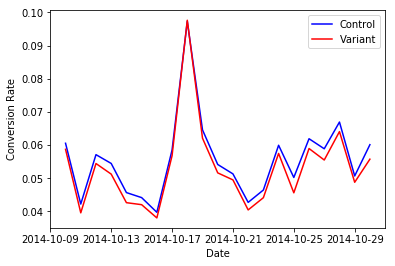

In [20]:
# plot conversion rate over days
plt.plot(df.Date.unique(), X.loc[X.index.get_level_values('Purchase') == 1, 'Visitors_Control'].values, color='blue', label='Control')
plt.plot(df.Date.unique(), X.loc[X.index.get_level_values('Purchase') == 1, 'Visitors_Variant'].values, color='red', label='Variant')

plt.legend()

plt.xlabel('Date')
plt.ylabel('Conversion Rate')

plt.show()

In [21]:
# the maximum conversion rate for each design
print(X.loc[X.index.get_level_values('Purchase') == 1, 'Visitors_Control'].values.max())
print(X.loc[X.index.get_level_values('Purchase') == 1, 'Visitors_Variant'].values.max())

0.09732224946368373
0.09764148227753364


The conversion rate clearly has dynamic properties overtime with a clear spike. However both app versions seem to follow similar trajectories. During the peak they have no visual differences, otherwise the control has a higher conversion rate than the variant, which is consistent with what we previously noted.

In [22]:
# aggregate number of bounces for each day over the total number of customers 
Y = df.loc[df['Land'] == 1, :].groupby(['Date','Bounce']).sum() / df.loc[df['Land'] == 1, :].groupby(['Date']).sum()
Y.head()

Bounce      Land  Purchase  Visitors_Control  \
Date       Bounce                                                 
2014-10-10 0          NaN  0.666667       1.0          0.627465   
           1          NaN  0.333333       0.0          0.372535   
2014-10-11 0          NaN  0.666667       1.0          0.538392   
           1          NaN  0.333333       0.0          0.461608   
2014-10-12 0          NaN  0.666667       1.0          0.607012   

                   Visitors_Variant  
Date       Bounce                    
2014-10-10 0               0.613930  
           1               0.386070  
2014-10-11 0               0.517962  
           1               0.482038  
2014-10-12 0               0.587030

In [21]:
# verify the average of averages above is close to the overall conversion rate from Question 2 for each version
print(Y.loc[Y.index.get_level_values('Bounce') == 1, 'Visitors_Control'].mean())
print(Y.loc[Y.index.get_level_values('Bounce') == 1, 'Visitors_Variant'].mean())

0.3960114315717605
0.41187039270635023


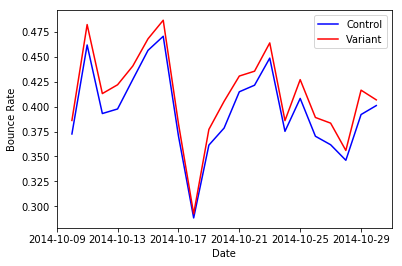

In [23]:
# plot bounce rate over days
plt.plot(df.Date.unique(), Y.loc[Y.index.get_level_values('Bounce') == 1, 'Visitors_Control'].values, color='blue', label='Control')
plt.plot(df.Date.unique(), Y.loc[Y.index.get_level_values('Bounce') == 1, 'Visitors_Variant'].values, color='red', label='Variant')

plt.legend()

plt.xlabel('Date')
plt.ylabel('Bounce Rate')

plt.show()

In [36]:
# the minimum bounce rate for each design
print(Y.loc[Y.index.get_level_values('Bounce') == 1, 'Visitors_Control'].values.min())
print(Y.loc[Y.index.get_level_values('Bounce') == 1, 'Visitors_Variant'].values.min())

0.2885060561255731
0.2926008128008638


A similar story to the conversion rate plot. There is a dynamic process over time with the minimum bounce rate lining up with the maximum conversion rate. At the minimum the two app designs line up but overall the control has a lower bounce rate than the variant.

## Question 4: Supplementary Analysis
Is there a group or property that performs better on the variant than the control?

In [26]:
df.head()

,Date,Channel,User Type,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant
0,2014-10-10,Affiliate,Returning User,0,0,0,1211,1175
1,2014-10-10,Affiliate,Returning User,1,0,0,4076,4810
2,2014-10-10,Affiliate,Returning User,1,1,0,2766,3386
3,2014-10-10,Affiliate,Returning User,0,0,1,196,159
4,2014-10-10,Affiliate,Returning User,1,0,1,358,332


In [27]:
# examine conversion rate between different channels that brought users to the platform
Z = df.groupby(['Channel','Purchase']).sum() / df.groupby(['Channel']).sum()
Z['difference'] = (Z['Visitors_Variant'] - Z['Visitors_Control']) / Z['Visitors_Control']
Z

Bounce      Land  Purchase  Visitors_Control  \
Channel      Purchase                                                 
Affiliate    0            1.0  0.666667       NaN          0.944546   
             1            0.0  0.333333       NaN          0.055454   
Direct       0            1.0  0.666667       NaN          0.944917   
             1            0.0  0.333333       NaN          0.055083   
Email        0            1.0  0.666667       NaN          0.941110   
             1            0.0  0.333333       NaN          0.058890   
Paid Search  0            1.0  0.666667       NaN          0.942974   
             1            0.0  0.333333       NaN          0.057026   
SEO          0            1.0  0.666667       NaN          0.946632   
             1            0.0  0.333333       NaN          0.053368   
Social Media 0            1.0  0.666667       NaN          0.937189   
             1            0.0  0.333333       NaN          0.062811   

                       Visitors_Variant  difference  
Channel      Purchase                                
Affiliate    0                 0.945072    0.000557  
             1                 0.054928   -0.009495  
Direct       0                 0.948329    0.003611  
             1                 0.051671   -0.061951  
Email        0                 0.944655    0.003767  
             1                 0.055345   -0.060202  
Paid Search  0                 0.945647    0.002835  
             1                 0.054353   -0.046875  
SEO          0                 0.949374    0.002897  
             1                 0.050626   -0.051379  
Social Media 0                 0.936858   -0.000353  
             1                 0.063142    0.005270

Except for social media, all channels have a lower conversion rate than the control. Social media did have a slightly higher conversion rate with the variant design though this was less than a 1% increase in purchasers.

In [28]:
# examine bounce rate between different channels that brought users to the platform
Z = df.loc[df['Land'] == 1, :].groupby(['Channel','Bounce']).sum() / df.loc[df['Land'] == 1, :].groupby(['Channel']).sum()
Z['difference'] = (Z['Visitors_Variant'] - Z['Visitors_Control']) / Z['Visitors_Control']
Z

Bounce      Land  Purchase  Visitors_Control  \
Channel      Bounce                                                 
Affiliate    0          NaN  0.666667       1.0          0.599524   
             1          NaN  0.333333       0.0          0.400476   
Direct       0          NaN  0.666667       1.0          0.607853   
             1          NaN  0.333333       0.0          0.392147   
Email        0          NaN  0.666667       1.0          0.609353   
             1          NaN  0.333333       0.0          0.390647   
Paid Search  0          NaN  0.666667       1.0          0.591058   
             1          NaN  0.333333       0.0          0.408942   
SEO          0          NaN  0.666667       1.0          0.603580   
             1          NaN  0.333333       0.0          0.396420   
Social Media 0          NaN  0.666667       1.0          0.598011   
             1          NaN  0.333333       0.0          0.401989   

                     Visitors_Variant  difference  
Channel      Bounce                                
Affiliate    0               0.590358   -0.015288  
             1               0.409642    0.022887  
Direct       0               0.586716   -0.034773  
             1               0.413284    0.053901  
Email        0               0.593680   -0.025720  
             1               0.406320    0.040119  
Paid Search  0               0.575567   -0.026210  
             1               0.424433    0.037883  
SEO          0               0.588834   -0.024432  
             1               0.411166    0.037199  
Social Media 0               0.590449   -0.012645  
             1               0.409551    0.018812

Every channel had a higher bounce rate with the variant design than the control.

In [29]:
# examine conversion rate between new and returning user 
Z = df.groupby(['User Type','Purchase']).sum() / df.groupby(['User Type']).sum()
Z['difference'] = (Z['Visitors_Variant'] - Z['Visitors_Control']) / Z['Visitors_Control']
Z

Bounce      Land  Purchase  Visitors_Control  \
User Type      Purchase                                                 
New User       0            1.0  0.666667       NaN          0.947153   
               1            0.0  0.333333       NaN          0.052847   
Returning User 0            1.0  0.666667       NaN          0.940426   
               1            0.0  0.333333       NaN          0.059574   

                         Visitors_Variant  difference  
User Type      Purchase                                
New User       0                 0.948809    0.001748  
               1                 0.051191   -0.031338  
Returning User 0                 0.944162    0.003973  
               1                 0.055838   -0.062720

The variant had a lower conversion rate for both types of users. The conversion rate for returning users is twice as worse than for new users, suggesting the variant really is a poor choice compared to the old one.

In [30]:
# examine bounce rate between new and returning user 
Z = df.loc[df['Land'] == 1, :].groupby(['User Type','Bounce']).sum() / df.loc[df['Land'] == 1, :].groupby(['User Type']).sum()
Z['difference'] = (Z['Visitors_Variant'] - Z['Visitors_Control']) / Z['Visitors_Control']
Z

Bounce      Land  Purchase  Visitors_Control  \
User Type      Bounce                                                 
New User       0          NaN  0.666667       1.0          0.600923   
               1          NaN  0.333333       0.0          0.399077   
Returning User 0          NaN  0.666667       1.0          0.606895   
               1          NaN  0.333333       0.0          0.393105   

                       Visitors_Variant  difference  
User Type      Bounce                                
New User       0               0.585474   -0.025709  
               1               0.414526    0.038712  
Returning User 0               0.590153   -0.027586  
               1               0.409847    0.042589

A similar story, the variance bounces both types of users more than the control though there is less of a difference than was apparent with conversion rates.

## Question 4: Supplementary Analysis
Overall no matter how we examine the data, the variant design performs worse than the established current design so we should therefore not implement the variant design app wide. The only time the variant design did not perform worse when both design choices peaked. This suggested at least during extreme events both work comparably, but on a day to day basis the variant is a poor choice. 